<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/2022-04-17-tensorflow/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is tensorflow ?

Application 

what is tensor, and flow

constant 

variable 

placeholder 

sparse tensor

some calculation 

tensorboard


#**Tensorflow**

Deep Learning algorithms have been used for several years across many products and areas at Goo‐
gle, such as search, translation, advertising, computer vision, and speech recognition.
TensorFlow is, in fact, a second-generation system for implementing and deploying
deep neural networks at Google, succeeding the DistBelief project that started in
2011.


`In November 2015 it became open source FrameWork`

**Some Real Life use of Tensorflow**

**1. state of the art computer vision for all :** 

Researchers, data scientists, and engineers have designed advanced deep neural
networks that obtain highly accurate results in understanding visual content.These types of deep Neaural Network are trained of large dataset, taking much time, resources and efforts. then the researcher published pretrained model.

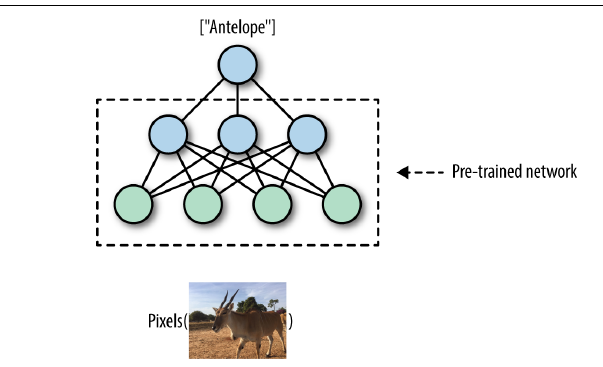


2. `Generating rich natural language description for images` : 
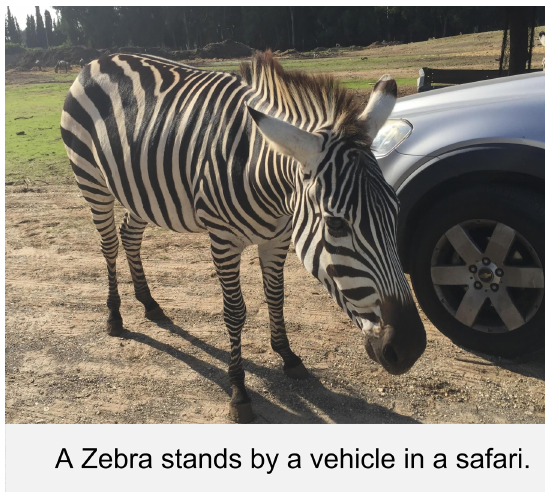

**3. `Text summrizer`:** 

Natural language understanding (NLU) is a key capability for building AI systems.
Tremendous amounts of text are generated every day: web content, social media,
news, emails, internal corporate correspondences, and many more. One of the most
sought-after abilities is to summarize text, taking long documents and generating
succinct and coherent sentences that extract the key information from the original text.

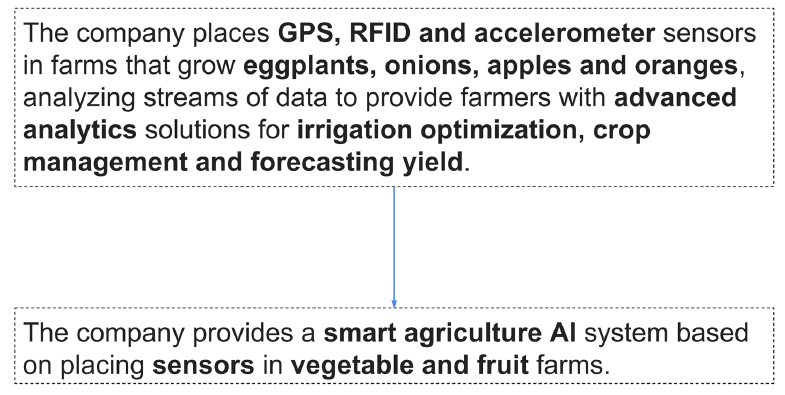


**4. Self Driving Car**

**Who will learn**

Python Developer 
machine learning Engineer 
data scientist 
deep learning engineer 
computer vision / NLP

**Tensorflow**

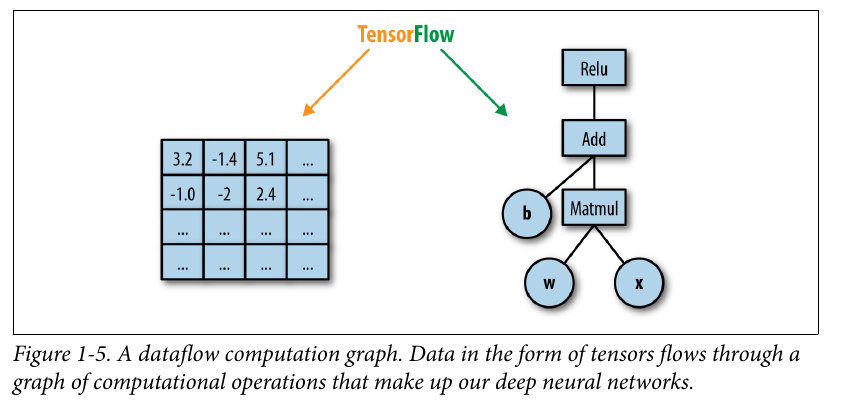

**Overview**

Tensorflow is a softwere framework for numerical computations based on dataflow graphs.  specially (Deep Neural Network)

It is portable : A tensorflow neural net could be trained in the cloud, distributed system and a laptop. : model can be deployed on Andriod, IOS, Raspberry. also compatible with linux,windows,and macos.

The core is in C++ , cuda and fronted doveloped using Python.

values of weights and bias are parameter 
and all other hyperparameter.





In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()

2.8.0


In [ ]:
h = tf.constant("hello")
w = tf.constant("world")
hw = h + w
# does not compute the sum of h and w, but rather adds the summation operation to a
# graph of computations to be done later.

print(hw)


with tf.compat.v1.Session() as sess:
  ans = sess.run(hw)

  """Next, the Session object acts as an interface to the external TensorFlow computation
mechanism, and allows us to run parts of the computation graph we have already
defined. The line:"""

print(ans)


Tensor("add:0", shape=(), dtype=string)
b'helloworld'


#**Variable**

In [ ]:
init_val = tf.compat.v1.random_normal((1, 5), 0, 1)
# print("random normal values :{}".format(init_val.eval()))
var = tf.Variable(init_val, name='var')
print("pre var : {}".format(var))

init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
  sess.run(init)
  post_var = sess.run(var)

print("post var :{}".format(post_var))


pre var : <tf.Variable 'var:0' shape=(1, 5) dtype=float32>
post var :[[-0.411547    0.46954647  0.13404061 -1.4463865  -0.42814407]]


#**PlaceHolder**

In [ ]:
# define a placeholder
# ph = tf.placeholder(tf.float32, shape=(None, 10))

In [ ]:
import numpy as np 
x_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

print(x_data.shape, w_data.shape)

(5, 10) (10, 1)


In [ ]:
with tf.Graph().as_default():
  x = tf.compat.v1.placeholder(tf.float32, shape=(5, 10))
  w = tf.compat.v1.placeholder(tf.float32, shape=(10, 1))
  b = tf.fill((5, 1), value=-1.)
  xw = tf.matmul(x, w)

  xwb = xw + b

  xwb = xw + b

  s = tf.reduce_max(xwb)
  with tf.compat.v1.Session() as sess:
    outs = sess.run(s, feed_dict={x:x_data, w:w_data})
  
print("outs : {}".format(outs))

outs : 6.3025054931640625


#**understanding tensorflow**

constant , variable , placeholder , sparse tensor, tf.ones, tf.ones_like, tf.ones_initializer, zeros, zeros_like, zeros_initializer, 
---



**computation graph** :`What is computation graph?`

TensorFlow allows us to implement machine learning algorithms by creating and
computing operations that interact with one another.

**Benefits of Graph Computations**:


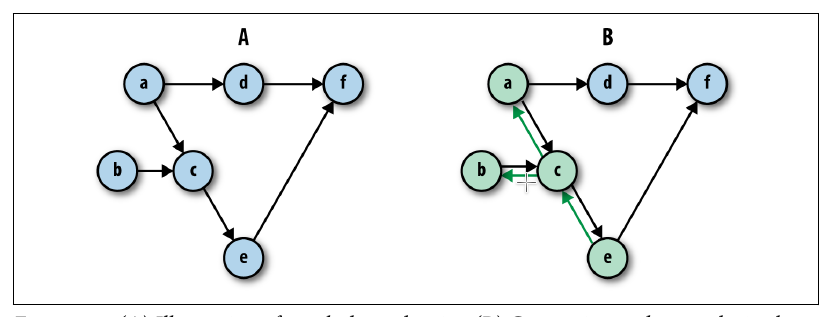

**Creating a Graph**



In [ ]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

In [ ]:
# let's perform some mathmatical function 
d = tf.multiply(a, b)
e = tf.add(c, b)
f = tf.subtract(d, e)

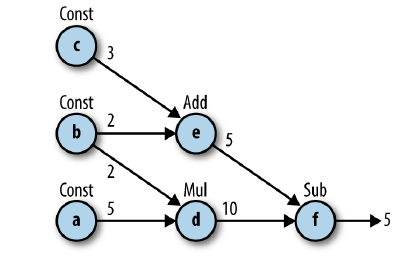

**Some Common Operation**

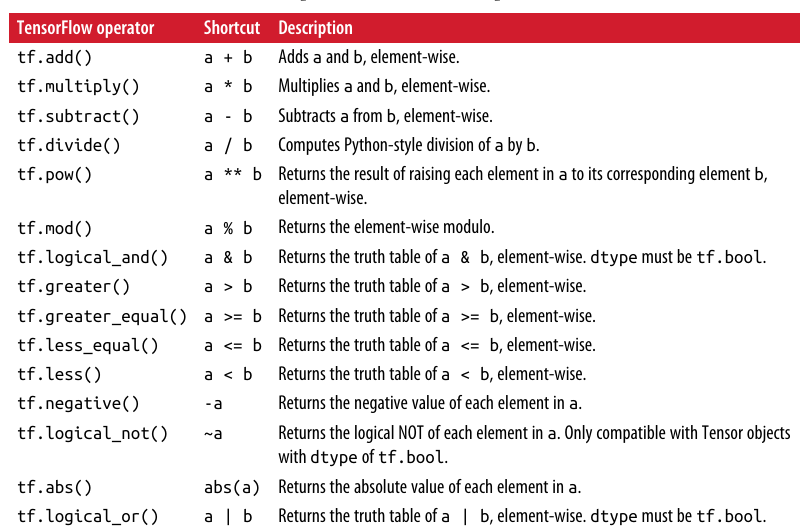

In [ ]:
# creating session and running it 
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# we launch the graph in a tf.session 
sess = tf.compat.v1.Session()
outs = sess.run(f)
sess.close()
print("outs = {}".format(outs))


outs = 5


In [ ]:
b = tf.constant(4)
a = tf.constant(7)

In [ ]:
d = tf.add(a, b)
c = tf.multiply(a, b)

In [ ]:
f = tf.add(d, c)
e = tf.subtract(d, c)

In [ ]:
g = tf.divide(f, e)

In [ ]:
sess2 = tf.compat.v1.Session()
out2 = sess2.run(g)
sess2.close()
print("outs2 : {} ".format(out2))

outs2 : -2.2941176470588234 


**Assignment Time**

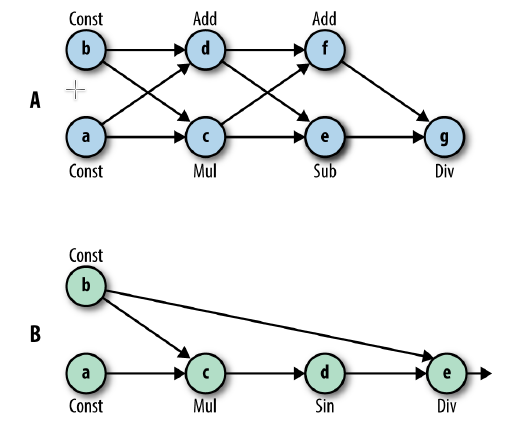

**Constructing and Manging Our Graph** 🇰

In the previous example a default graph is automatically created

In [ ]:
import tensorflow as tf
tf.compat.v1.get_default_graph()
# g = tf.Graph()
# print(g)

In [ ]:
g = tf.Graph()
a = tf.constant(5)
print(a.graph is g)
print(a.graph is tf.compat.v1.get_default_graph())

False
True


**With session , Fetches**


In [ ]:
with tf.compat.v1.Session() as sess:
  fetches = [a,b,c,d,e,f,g]
  outs = sess.run(fetches)

print("outs : {}".format(outs))

# Automatically closing the session
# Opening a session using the with clause will ensure the session is
# automatically closed once all computations are done.



outs : [7, 4, 28, 11, -17, 39, -2.2941176470588234]


**Execution**

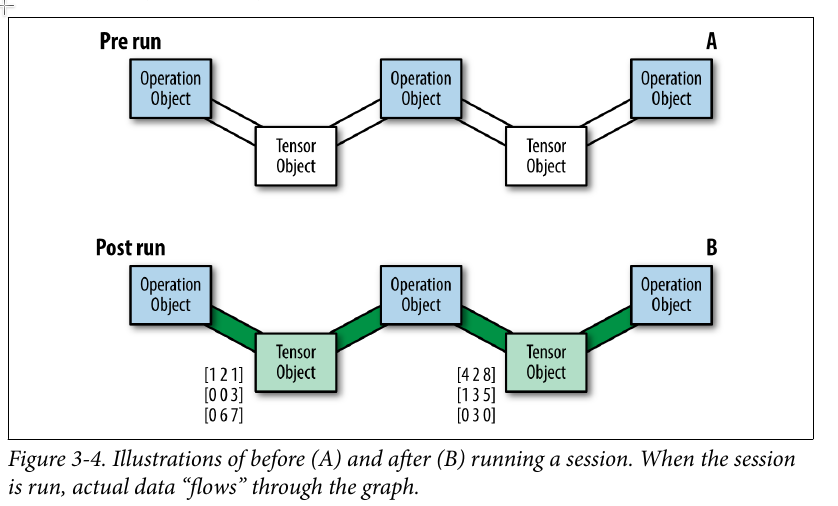

In [ ]:
c = tf.constant(8)
print(c)

Tensor("Const_17:0", shape=(), dtype=int32)


**attributs**

name, shape, dtype

**casting**

In [ ]:
x = tf.constant([1, 2, 3], name = 'x', dtype=tf.float32)
print(x.dtype)
x = tf.cast(x, dtype=tf.int32)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int32'>


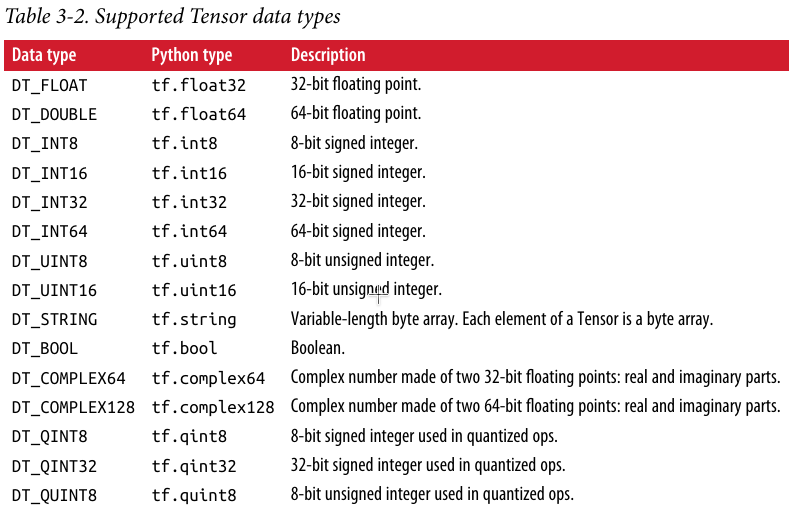

#**Tensor Arrays and Shapes**

1*N Tensor : vector

1*1 Tensor : scalar

n*n Tensor : matrix

n*n*n Tensor : 3-d Matrix


In [ ]:
import tensorflow as tf
c = tf.constant([[1, 2, 3],
                 [4, 5, 6]])
print("python list input {}".format(c.get_shape()))

python list input (2, 3)


In [ ]:
d = tf.constant([[[1, 2, 3],
                  [4, 5, 6]], 
                 [[1, 1, 1], 
                  [2, 2, 2]]])
print("python list input {}".format(d.get_shape()))

python list input (2, 2, 3)


**Random Number Generator**

tf.random.normal() : shape, mean , standard deviation

tf.random.truncated_normal() ⁉

tf.random.uniform() : 

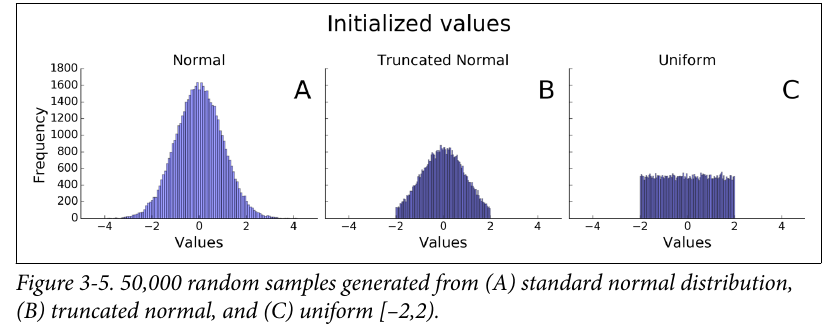

**linspace**

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.InteractiveSession() #interactiveSession is for a specific instance
c = tf.linspace(0, 4, 5)
print("The content of c : \n {}\n".format(c.eval()))
sess.close()

The content of c : 
 [0. 1. 2. 3. 4.]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


**Some more Initializer**

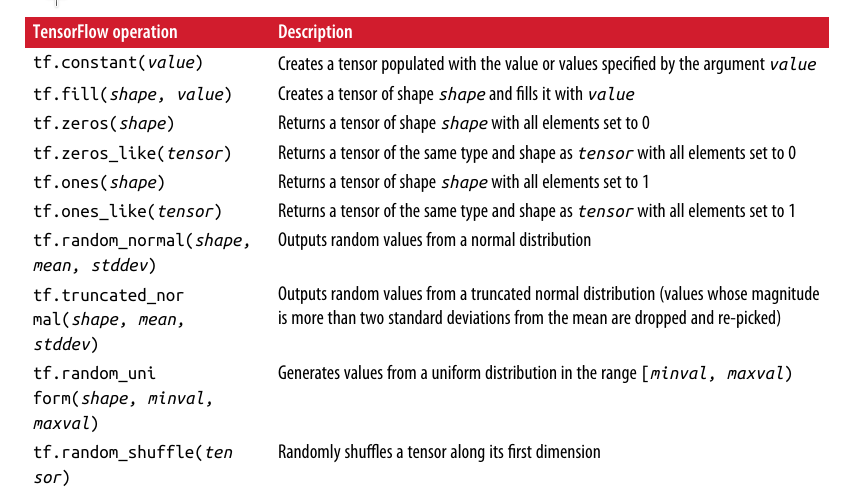

**Matrix Multiplication**


In [ ]:
A = tf.constant([[1,2,3],
                 [4, 5, 6]])
print(A.get_shape())

x = tf.constant([1, 0 , 1])

print(x.get_shape())

(2, 3)
(3,)


In [ ]:
# lets make dimension equal 

x = tf.expand_dims(x, 1)
print(x.get_shape())

(3, 1)


In [ ]:
b = tf.matmul(A, x)
sess = tf.compat.v1.InteractiveSession()
print("mat mul result : {}".format(b.eval()))
sess.close()

mat mul result : [[ 4]
 [10]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


#**Steps Training and Prediction**

In [ ]:
# let's make placeholder for input and output , and variables for weights and intercept

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, shape=[None,3])
y_true = tf.compat.v1.placeholder(tf.float32, shape=None)

w = tf.Variable([[0, 0, 0]], dtype=tf.float32, name='weights')
b = tf.Variable(0, dtype=tf.float32, name='bias')


# calculating y_pred
y_pred = tf.matmul(w, tf.transpose(x)) + b

2. defining loss function

    mse and cross entropy



In [ ]:
# mse 
loss = tf.reduce_mean(tf.square(y_true-y_pred))

# cross entropy
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
loss = tf.reduce_mean(loss)

3. optimization : gradient descent 



In [ ]:
import tensorflow.compat.v1 as tf
learning_rate = 0.002
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

#**Regreesion Problem**

In [ ]:
# in this we willl calculate weiths and bias
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
x_data = np.random.randn(2000, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(1, 2000)*0.1

y_data = np.matmul(w_real, x_data.T) + b_real + noise

Instructions for updating:
non-resource variables are not supported in the long term


model

In [ ]:
NUM_STEPS = 10
g = tf.Graph()
wb_ = []

with g.as_default():
  x = tf.compat.v1.placeholder(tf.float32, shape=[None, 3])
  y_true = tf.compat.v1.placeholder(tf.float32, shape=None)
  
  with tf.name_scope("inference") as scope:
    w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
    b = tf.Variable(0, dtype=tf.float32, name = 'bias')
    y_pred = tf.matmul(w, tf.transpose(x)) + b

  with tf.name_scope("loss") as scope:
    loss = tf.reduce_mean(tf.square(y_true-y_pred))
  
  with tf.name_scope("train") as scope:
    learning_rate = 0.5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)

  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    sess.run(init)
    for step in range(NUM_STEPS):
      sess.run(train, feed_dict={x:x_data, y_true:y_data})
      if(step % 5 == 0 ):
        print(step,  sess.run([w, b]))
        wb_.append(sess.run([w, b]))
    
    print(10, sess.run([w, b]))



0 [array([[0.30701703, 0.50697064, 0.11920039]], dtype=float32), -0.20792827]
5 [array([[0.29882628, 0.50210345, 0.10076937]], dtype=float32), -0.20032328]
10 [array([[0.29882628, 0.50210345, 0.10076935]], dtype=float32), -0.2003233]


#**TensorBoard**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


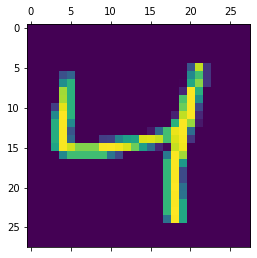

In [ ]:
plt.matshow(X_train[2])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2779 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1301 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0902 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0541 - accuracy: 0.9838


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs